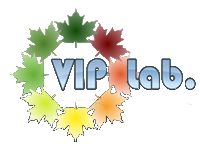

In [1]:
from IPython.display import Image
img = Image('https://vip.arizona.edu/images/logoviplab.png')
img

# BE-BAT 485/585
## Danielle Tadych

In this exercise:<br>
 a) read data from an Excel file <br>
 b) user defined functions <br>
 c) Downsampling <br>
 d) Supersampling   <br>

## Load necessary libraries 

In [1]:
### Load Libraries 
# load library modules 
import os # Load the Operating System library to access & manipulate files and  DIRs
import xlrd # Load the library that reads Exel sheets
import numpy as np # Load the famous NUMPY library the most useful library in  Python
import matplotlib.pyplot as plt # Load the graphing/plotting library
import matplotlib.image as mpimg
import matplotlib.colors
import importlib.util


# This portion of the code sets the proper path and imports from a specified location any user libraties 
import sys
sys.path.append('../Library/')
# Or you could import the module as a whole,
import viplab_lib as vip

# Considering your module contains a function called my_func, you could also import it as:
# from my_module import my_func

ModuleNotFoundError: No module named 'viplab_lib'

## Design a User Defined Library for changing image resolution

In [3]:
### User Defined Scaling Libraries 

### Scale down
def downsample_data(data,n):
    #get size of input band
    nrowsIN,ncolsIN=data.shape
    #calculate output band size
    nrows=nrowsIN // n
    ncols=ncolsIN // n
    
    #create empty band
    datares=np.zeros((nrows,ncols))
    for i in range(0,nrows):
        for j in range(0,ncols):
            
            #calculate row at input band
            rowIN=i*n
            #check for out of boundary row
            if(rowIN<0):
                rowIN=0
            elif (rowIN>nrowsIN-1):
                rowIN=nrowsIN-1
                
            #calculate col at input band    
            colIN=j*n
            #check for out of boundary column
            if(colIN<0):
                colIN=0
            elif (colIN>ncolsIN-1):
                colIN=nrowsIN-1
            
            
            #subset and get average
            avgvalue=np.mean(data[rowIN:rowIN+n,colIN:colIN+n])
            
            #get the integer value of the average
            datares[i,j]= int(avgvalue)
    return datares



## Design a User Defined Library for changing image resolution

In [5]:
### User Defined Scaling UP Library 

def supersample_data(data,n):
    #get size of input band
    nrowsIN,ncolsIN=data.shape
    #calculate output band size
    nrows=nrowsIN * n
    ncols=ncolsIN * n
    
    #create empty band
    datares=np.zeros((nrows,ncols))
    for i in range(0,nrows):
        for j in range(0,ncols):
            
            #calculate row at input band
            rowIN=int(i/n)
            #check for out of boundary row
            if(rowIN<0):
                rowIN=0
            elif (rowIN>nrowsIN-1):
                rowIN=nrowsIN-1
                
            #calculate col at input band    
            colIN=int(j/n)
            #check for out of boundary column
            if(colIN<0):
                colIN=0
            elif (colIN>ncolsIN-1):
                colIN=nrowsIN-1
            
            pixelvalue= data[rowIN,colIN]
            
            #get the integer value of the average
            datares[i,j]= pixelvalue
    return datares

In [14]:
#Load the image 
img = mpimg.imread('../Data/UA_Old_Main_New.jpg') # Load the whole image into a 3D Array that ahs the REd/Green/Blue

# Speate the layer (Using Python slicing on the third dimension)
DataRed = img[:, :, 0]
DataGreen = img[:, :, 1]
DataBlue = img[:, :, 2]

## Down sample the image by 4x4

In [15]:
print("Downsampling 4x4")
DataRed_Res4=downsample_data(DataRed,4)

Downsampling 4x4


## Super sample the image by 4x4

In [16]:
print("Supersampling 4x4")
DataRed_Super4=supersample_data(DataRed_Res4,4)

Supersampling 4x4


## Find the size of the 2D image

In [17]:
#Use numpy library to do these operation 
nrows, ncols= np.shape(DataRed)
print('Image width:  ', nrows)
print('Image height: ', ncols)

Image width:   1004
Image height:  1492


## Find the size of the 2D image

In [19]:
#Use numpy library to do these operation 

# This shows the power of Python and numpy with data. 
# One call to get two varibael on the same line
nrows_Super4, ncols_Super4= np.shape(DataRed_Super4)  

print('Supersampled Image width:  ', nrows_Super4)
print('Supersampled Image height: ', ncols_Super4)

Supersampled Image width:   1004
Supersampled Image height:  1492


## Find the size of the 2D image

In [20]:
#Use numpy library to do these operation 
nrows_Res4, ncols_Res4= np.shape(DataRed_Res4)
print('Image width:  ', nrows_Res4)
print('Image height: ', ncols_Res4)

Image width:   251
Image height:  373


In [ ]:
## Display images and use different colors

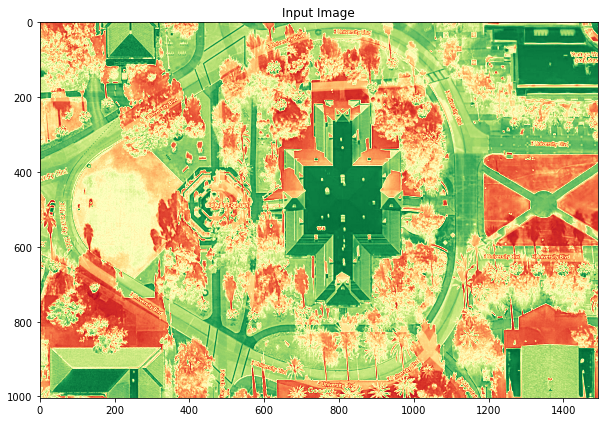

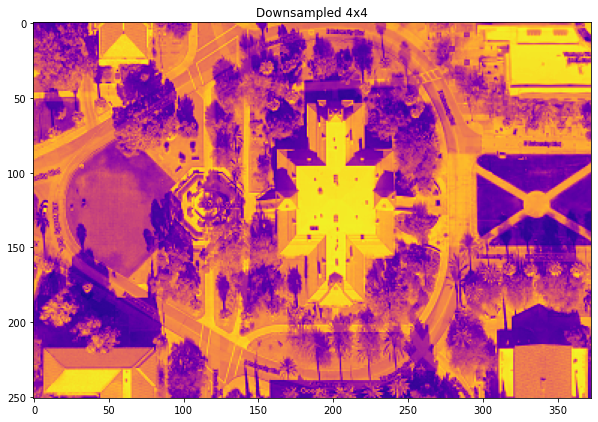

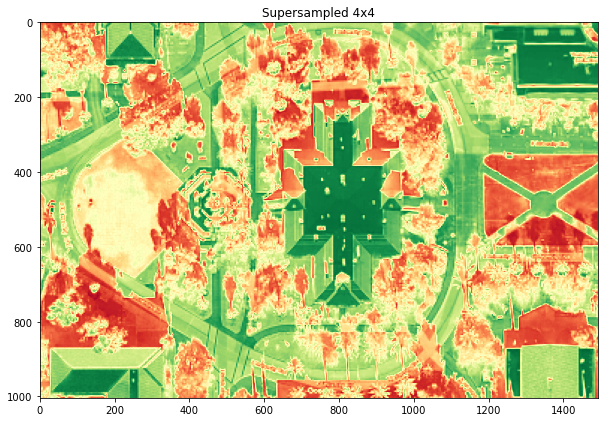

In [24]:
# Display RGB Image
plt.figure(figsize=(10,10))
plt.title('Input Image')
plt.imshow(DataRed, cmap='RdYlGn')  # Notice the color scheme 

# Display 'Red' band
plt.figure(figsize=(10,10))
plt.title('Downsampled 4x4')
plt.imshow(DataRed_Res4, cmap='plasma')   # Notice the color scheme 

# Display supersampled band
plt.figure(figsize=(10,10))
plt.title('Supersampled 4x4')
plt.imshow(DataRed_Super4, cmap='RdYlGn')   # Notice the color scheme 

# Plotting a Row of data from the original (full resolution), downsampled then supersampled images
## The purpose of this exercise is to see if the process is reversible? 
## Notice how the data/transect are different, why?

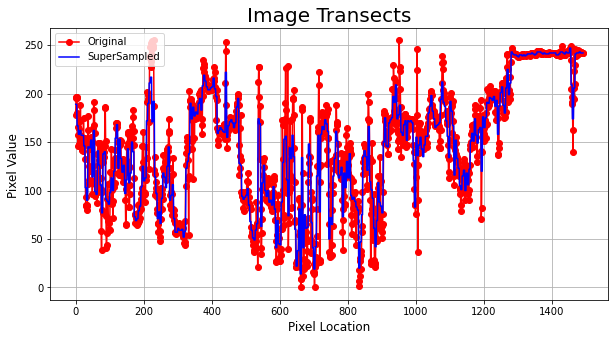

In [25]:
### Here we print a row of data to show what happened to the orignal data 

# Create data holders for the data with the correct size
# You could use this array for the X-Axis if you wish - see below

Xvalues=np.zeros(ncols)
for i in range(0,ncols):
  Xvalues[i]=i

# And we plot as usual
plt.figure(figsize=(10,5))  # Figure size 
plt.title('Image Transects',fontsize=20)
plt.xlabel('Pixel Location',fontsize=12)
plt.ylabel('Pixel Value ',fontsize=12)

#In case you want to use the Array from above for the X-Axis 
plt.plot(Xvalues,DataRed[125,:],"r-o",label="Original")
plt.plot(Xvalues,DataRed_Super4[125,:],"b-",label="SuperSampled")

plt.grid()
plt.legend(loc='upper left')

## Plot a subset of the row 

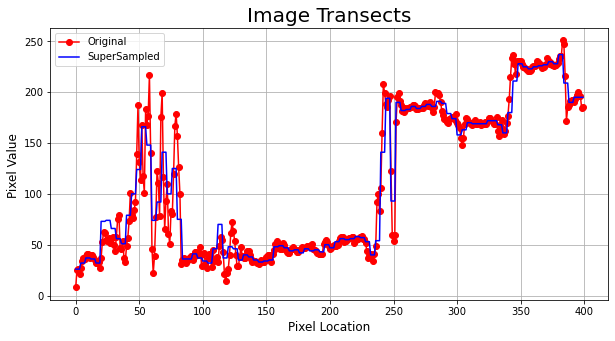

In [29]:
### Here we print a row of data to show what happened to the orignal data 

# And we plot as usual
plt.figure(figsize=(10,5))  # Figure size 
plt.title('Image Transects',fontsize=20)
plt.xlabel('Pixel Location',fontsize=12)
plt.ylabel('Pixel Value ',fontsize=12)

# You could also plot few pixels between Columns C1 and C2
plt.plot(DataRed[800,100:500],"r-o",label="Original")
plt.plot(DataRed_Super4[800,100:500],"b-",label="SuperSampled")

plt.grid()
plt.legend(loc='upper left')

# Homework - To do 
## Yor Job is to understand how the process changes the data and to what degrees and depending on what
## So work with the original image and using different fatcors 
## Down-sample it
## Then super-sample 
## Now Downsample then Supersample multiple times and observe what happens and explain

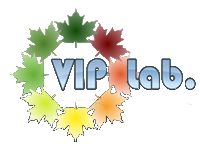

In [35]:
from IPython.display import Image
img = Image('https://vip.arizona.edu/images/logoviplab.png')
img

# BE 485/585
## DATE AND FULL NAME
In this exercise:<br>
 a) read a data from an Excel file <br>
 b) change the radiometric resolution <br>
 c) compare results <br>


In [36]:
# load library modules 
import os
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# This portion of the code sets the proper path and imports from a specified location any user libraties 
import sys
sys.path.append('../Library/')
# Or you could import the module as a whole,
import viplab_lib as vip
# Considering your module contains a function called my_func, you could also import it as:
# from my_module import my_func


In [37]:
# HERE IS ANOTHER CUSTOM USER DEFINED FUNCTION TO HANDLE CHANGIN THE RADIOMETRIC RESOLUTION 
def data_change_radiometric(data,InputMin,InputMax,nbits):
    #get size of input band
    nrows,ncols=data.shape
    
    #compute range of values for new radiometric resolution
    vmin=0
    vmax= np.power(2,nbits)-1
    
    delta=InputMax-InputMin
    
    print("Changin radiometric resolution to ",nbits," bits");
    print("New range of values ",vmin, " to ",vmax)
    
    #create empty band
    datares=np.zeros((nrows,ncols))
    for i in range(0,nrows):
        for j in range(0,ncols):
            
            #get pixel value from input
            value=data[i,j]
            #convert to new radiometric resolution
            value2=int((value*(vmax+1))/delta)
            
            if(value2<0):
              value2=0
            if(value2>vmax):
              value2=vmax-1          

            datares[i,j]= value2
    return datares

In [38]:
# Reference the Excel file to be read by Panda
workbook=pd.ExcelFile("../Data/LANDSAT8.A2017164.xlsx")

# Select the Excel sheets by name in a panda data frame 
df = pd.read_excel("../Data/LANDSAT8.A2017164.xlsx",header=None)

In [39]:
df.shape

(421, 428)

In [40]:
# Create data holders for the data with the correct size
#DataNDVI=np.zeros((nrows,ncols))

# Convert the Panda Data frame (Excel sheet) to a NumPy Array
DataNDVI=df.to_numpy()

## Find the size of this array and print it 

In [41]:
# This shows the power of Python and numpy with data. 
# One call to get two varibael on the same line
nrows, ncols= np.shape(DataNDVI)


print('Image width:  ', nrows)
print('Image height: ', ncols)

# Here is the power of NumPy ...get stats on the fly
print('Image Max value:  ', DataNDVI.max())
print('Image Min value: ', DataNDVI.min())
print('Image Mean value: ', DataNDVI.mean())

Image width:   421
Image height:  428
Image Max value:   8604
Image Min value:  -9376
Image Mean value:  2034.627944147224


# Display the image  with full radiometric resolution 

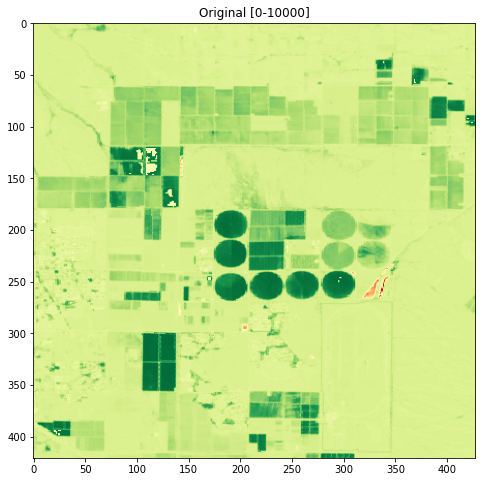

In [42]:
# Display Input band
plt.figure(figsize=(10,8))
plt.title('Original [0-10000]')
plt.imshow(DataNDVI, cmap='RdYlGn')
# Can you add a legend?
## plt.colorbar()

## Change the Radiometric Resolution to 1 BIT and display it

Changin radiometric resolution to  1  bits
New range of values  0  to  1


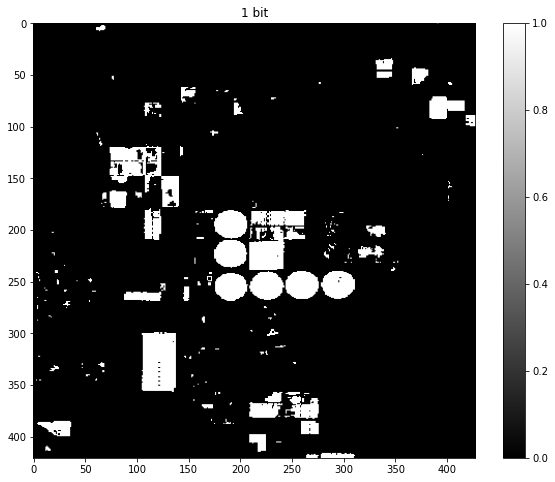

In [43]:
#Change data to 1 bit radiometric resolution

NDVI_vmin=0
NDVI_vmax=DataNDVI.max()

Data_1bit=data_change_radiometric(DataNDVI,NDVI_vmin,NDVI_vmax,1)

# Display Image 
plt.figure(figsize=(10,8))
plt.title('1 bit')
plt.imshow(Data_1bit, cmap='gray')
plt.colorbar()

## Change the Radiometric Resolution to 8 BITs and display it

Changin radiometric resolution to  8  bits
New range of values  0  to  255


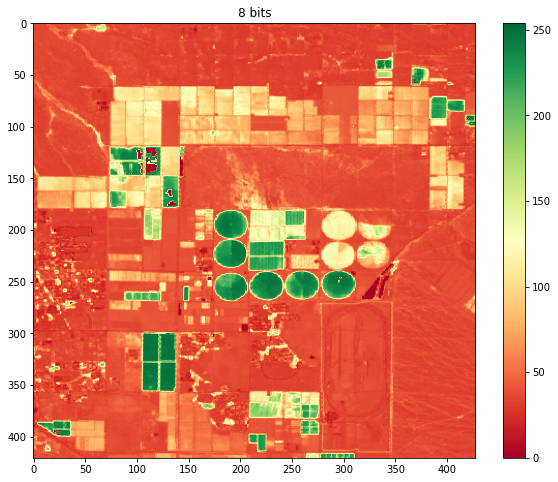

In [44]:
#Change data to 8 bit radiometric resolution
Data_8bit=data_change_radiometric(DataNDVI,NDVI_vmin,NDVI_vmax,8)

plt.figure(figsize=(10,8))
plt.title('8 bits')
plt.imshow(Data_8bit, cmap='RdYlGn')
plt.colorbar()

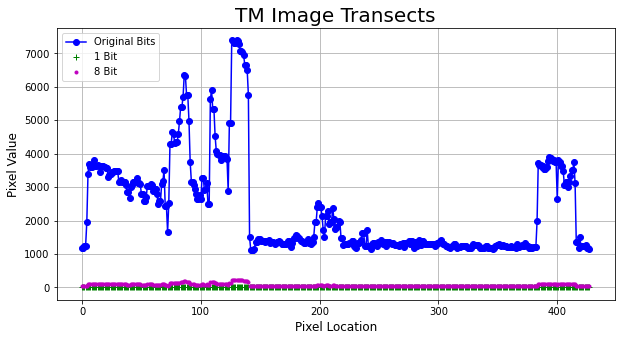

In [45]:
### Here we print a row of data to show what happened to the orignal 

# Optional: Create data holders for the X axis
Xvalues=np.zeros(ncols)
for i in range(0,ncols):
  Xvalues[i]=i

# And we plot as usual
plt.figure(figsize=(10,5))
plt.title('TM Image Transects',fontsize=20)
plt.xlabel('Pixel Location',fontsize=12)
plt.ylabel('Pixel Value',fontsize=12)

# Try to understand the paramters being used and chaneg them to ses impact 
plt.plot(Xvalues,DataNDVI[150,:],"b-o",label="Original Bits")
plt.plot(Xvalues,Data_1bit[150,:],"g+",label="1 Bit")
plt.plot(Xvalues,Data_8bit[150,:],"m.",label="8 Bit")

#These are some of the colors you can use 
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};

# Another way to plot without using excplcitly the X-axis  and onmly few pre-determined pixels 
#plt.plot(DataNDVI[15,100:200],"b-o",label="Original Bits")
#plt.plot(Data_1bit[15,100:200],"g+",label="1 Bit")
#plt.plot(Data_8bit[15,100:200],"m.",label="8 Bit")

plt.grid()
plt.legend(loc='upper left')
# Plot the image and indicate the location of the line

plt.show()


## <font color="red">Todo: Look at presentation</font>
<ul>
    <li>Generate datasets at 6 and 12 bits radiometric resolution</li>
    <li>Plot the results</li>
    <li>Extract a row of values at each resolution and plot the values in an X-Y graph (Use Matplotlib) </li>
    <li>Create separate  plots for each resolution on the same 'canvas row' so you can visually compare them</li>
</ul>

In [46]:
# Put your code/solution here 

In [47]:
#display a message to know the program ended
print("program ended.")

program ended.


# The code below is meant to give you tips

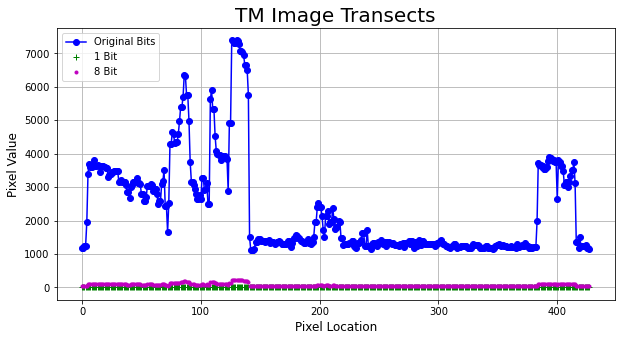

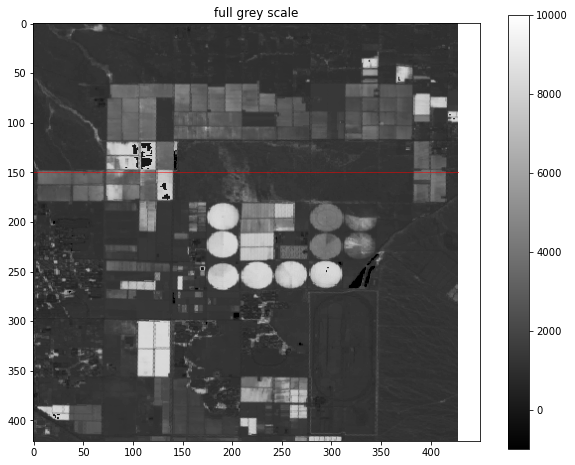

In [49]:
## Few hints

### Here we print a row of data to show what happened to the orignal 

# Optional: Create data holders for the X axis
Xvalues=np.zeros(ncols)
for i in range(0,ncols):
  Xvalues[i]=i

# And we plot as usual
plt.figure(figsize=(10,5))
plt.title('TM Image Transects',fontsize=20)
plt.xlabel('Pixel Location',fontsize=12)
plt.ylabel('Pixel Value',fontsize=12)

# Try to understand the paramters being used and chaneg them to ses impact 
plt.plot(Xvalues,DataNDVI[150,:],"b-o",label="Original Bits")
plt.plot(Xvalues,Data_1bit[150,:],"g+",label="1 Bit")
plt.plot(Xvalues,Data_8bit[150,:],"m.",label="8 Bit")

#These are some of the colors you can use 
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};

# Another way to plot without using excplcitly the X-axis  and onmly few pre-determined pixels 
#plt.plot(DataNDVI[15,100:200],"b-o",label="Original Bits")
#plt.plot(Data_1bit[15,100:200],"g+",label="1 Bit")
#plt.plot(Data_8bit[15,100:200],"m.",label="8 Bit")



plt.grid()
plt.legend(loc='upper left')
# Plot the image and indicate the location of the line

# Here we show the imaeg again and indicate the location fo the transect 
# Please pay attention to other calls/code and understand what it does 

plt.figure(figsize=(10,8))
plt.title('full grey scale')

plt.imshow(DataNDVI, cmap='gray')
plt.clim(-1000, 10000) # Here we set the min and max value for min and max color
plt.colorbar()


# Now draw a line= transect
x = [0, 428]
y = [150, 150]
plt.plot(x, y, color="red", linewidth=1, alpha=0.5)

plt.show()
#(421, 428)